# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [23]:
import sys
sys.path.append('./')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          
    transforms.CenterCrop(224),                             
    transforms.ToTensor(),                           
    transforms.Normalize((0.485, 0.456, 0.406),      
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

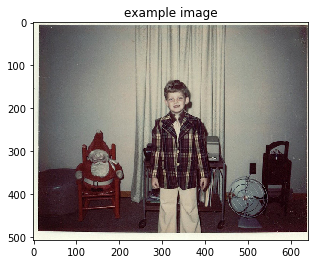

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [25]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [64]:
# Watch for any changes in model.py, and re-load it automatically.
#%load_ext autoreload
#%autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-1.pkl'
decoder_file = 'decoder-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models/', 'encoder-1.pkl')))
decoder.load_state_dict(torch.load(os.path.join('./models/', 'decoder-1.pkl')))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

DecoderRNN(
  (word_embeddings): Embedding(8856, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=8856, bias=True)
)

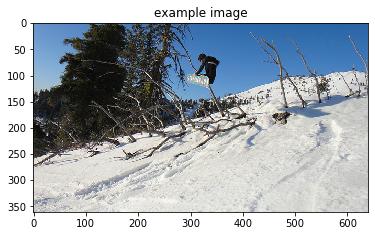

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

In [91]:
type(image)

torch.Tensor

In [97]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)
features

tensor([[[ 1.0147e+01, -1.1826e+01, -5.5387e+00,  8.4932e+00, -7.3119e+00,
           4.8261e-02,  1.2053e+01,  1.0932e+01, -8.5151e+00, -9.5558e+00,
          -1.1528e+01, -1.1849e+01,  9.4356e+00,  6.0626e+00, -1.9958e+00,
           1.2750e-01, -6.4476e+00, -8.3885e+00, -5.7732e+00, -1.2108e+01,
           1.0660e+01,  1.3230e+01, -3.8055e+00,  8.5028e+00, -7.0704e+00,
           8.0161e+00, -2.7647e+00,  1.1049e+01, -1.0874e+01,  1.4566e+00,
          -1.1208e+01,  6.6163e-01, -3.2861e+00, -1.0416e+01,  3.5833e+00,
           3.6322e+00,  1.1984e+01,  1.1733e+01,  4.6976e+00,  9.0981e+00,
          -2.3238e+00,  1.2488e+01, -1.0925e+01,  7.5033e+00, -8.2165e+00,
           4.0507e+00, -1.0685e+01, -3.6691e+00, -5.8490e-01,  9.1187e+00,
           1.0362e+01,  1.0731e+01,  1.0481e+01, -1.0307e+01,  6.3601e+00,
           9.5589e+00,  8.7517e+00, -8.4148e+00,  1.2440e+01, -8.5978e+00,
          -8.7893e+00,  1.2908e+01, -4.0959e+00,  2.9818e+00,  1.3200e+01,
          -5.1460e+00,  1

In [104]:
output = decoder.sample(torch.Tensor(np.ones((1, 1, 512))).to(device))

In [105]:
output

[132, 79, 3, 20, 818, 21, 3, 112, 18, 1, 18, 1, 18, 1, 18, 1, 18, 1, 18, 1]

In [106]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

example sentence: bench near a white plate with a table . 


In [100]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

#assert (type(output)==list), "Output needs to be a Python list" 
#assert all([type(x)==int for x in output]), "Output should be a list of integers." 
#assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 169, 130, 224, 39, 3, 112, 21, 3, 112, 18, 1, 18, 1, 18, 1, 18, 1, 18]


<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [57]:
# TODO #4: Complete the function.
def clean_sentence(output):
 
    sentence = ""
    for idx in output:
        if idx == 0:
            continue
        if idx == 1:
            break
        word = data_loader.dataset.vocab.idx2word[idx]
        sentence = sentence + word + ' '
        
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [58]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: a man is sitting on a table with a table . 


<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [110]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

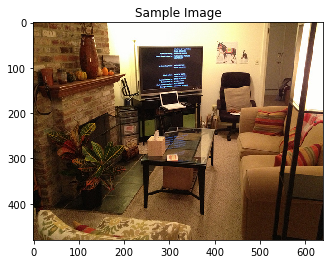

a man is sitting on a table with a table . 


In [111]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

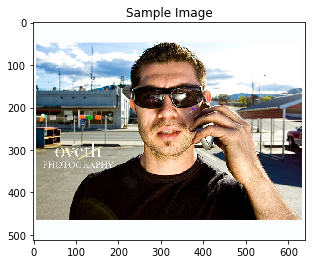

a man is sitting on a table with a table . 


In [112]:
get_prediction()

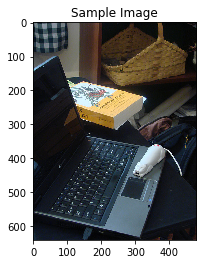

a man is sitting on a table with a table . 


In [113]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

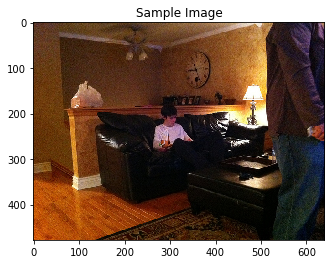

a man is sitting on a table with a table . 


In [114]:
get_prediction()

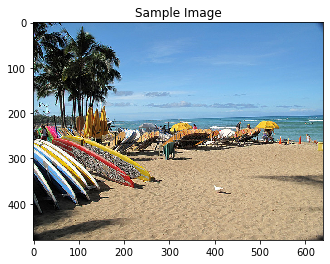

a man is sitting on a table with a table . 


In [123]:
get_prediction()